# Deep Learning y diagnóstico de diabetes.

Como todo script de Python, comencemos a importar todas las funciones e instancias que ternemos que usar. 

In [233]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
import sklearn
bfrom sklearn import metrics

Así pues, podemos comenzar a importar los datos de diabetes, este conjunto de datos representa muestras de glucosa, insulina, IMC, etc. De 767 personas...

In [150]:
data = pd.read_csv("diabetes.csv")

In [151]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Primero notando que la diabetes pedigree function significa la probabilidad de tener diabetes dado haber tenido su antecedente familiar. BMI significa el indice de masa corporal (body mass index). Luego La medición de los pliegues cutáneos es una técnica para estimar cuánta grasa hay en el cuerpo (skin thickness).

Ahora veamos si hay agujeros en la tabla de datos:

In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Tenemos que comenzar a estudiar los datos, podemos observar que el estudio en su mayoría fue realizado a personas de entre 20 y 30 años, por ende al momento de elegir los conjuntos de entrenamiento y validación debemos obtener cantidades significativas de cada edad... Eso sería lo mejor.

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

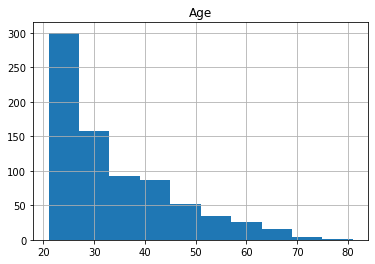

In [153]:
data.hist(column = "Age")

Vemso del total cuantos son diabéticos (1) y cuantos no son (1)


array([[<AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

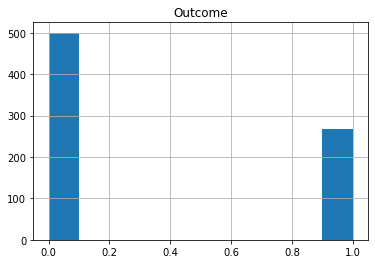

In [154]:
data.hist(column = "Outcome")

Ahora, podemos comenzar a estudiar las constantes de correlación...

In [156]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Ahora podemos observar que podemos definir nuevas varibales las cuales pueden generar variables altamente relacionadas con el outcome por ejemplo podriamos definir $\eta = \frac{age}{pregnancies}$ y de nuevo ver con la nueva variable como se relaciona con la outcome, la idea es hacer que se relacionen masivamente. 

Podemos estudiar de otra forma los datos:

In [157]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


De lo que noto es que como es una probabilidad, las números no pueden ser mayores que 1, a lo mas pueden ser 1, entonces tendré que escalar los datos. Así como intentar reparar los valores que tienen ceroen BMI.


In [160]:
for i in data:
    data[i] = data[i].replace(0, data[i].mean())

In [161]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.400782,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.576145
std,2.984162,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.310515
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.348958
25%,2.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.348958
50%,3.845052,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.348958
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [162]:
corr_matrix = data.corr()
corr_matrix["Outcome"].sort_values(ascending = False)

Outcome                     1.000000
Glucose                     0.492908
BMI                         0.312254
Pregnancies                 0.247971
Age                         0.238356
Insulin                     0.179185
SkinThickness               0.175026
DiabetesPedigreeFunction    0.173844
BloodPressure               0.162986
Name: Outcome, dtype: float64

Finalmente, basta ver las correlaciones pero de forma gráfica:

array([[<AxesSubplot:xlabel='Pregnancies', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='Glucose', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='BloodPressure', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='SkinThickness', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='Insulin', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='BMI', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Pregnancies'>,
        <AxesSubplot:xlabel='Age', ylabel='Pregnancies'>],
       [<AxesSubplot:xlabel='Pregnancies', ylabel='Glucose'>,
        <AxesSubplot:xlabel='Glucose', ylabel='Glucose'>,
        <AxesSubplot:xlabel='BloodPressure', ylabel='Glucose'>,
        <AxesSubplot:xlabel='SkinThickness', ylabel='Glucose'>,
        <AxesSubplot:xlabel='Insulin', ylabel='Glucose'>,
        <AxesSubplot:xlabel='BMI', ylabel='Glucose'>,
        <AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Glucose'>,
        <AxesSubplot:xlabel='Age', ylabel='

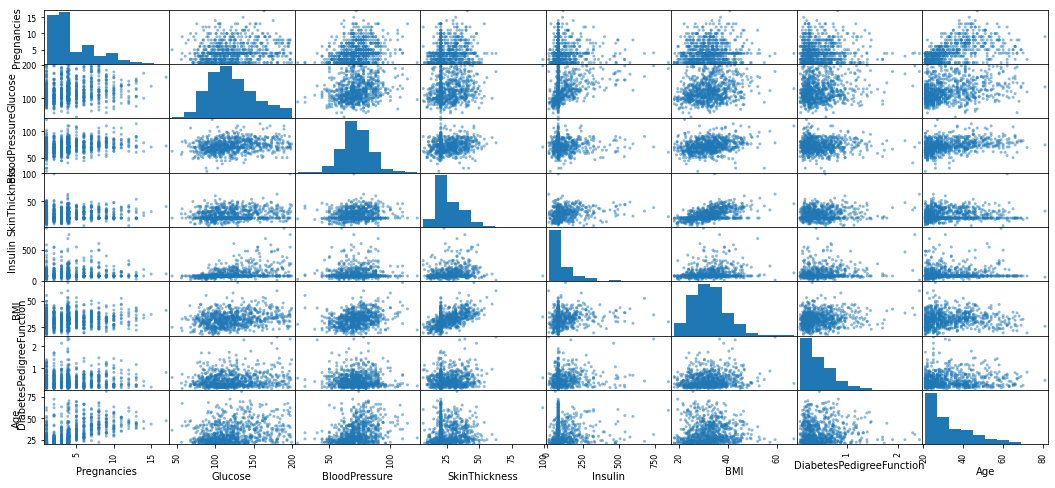

In [163]:
atributos = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
scatter_matrix(data[atributos], figsize=(18,8))

Ahora vamos a escalar los datos puesto que los algoritmos de ml, no funcionan chido si los datos están no escalados.

In [169]:
escal    = StandardScaler()
data_esc = escal.fit_transform(data)
data_esc

array([[ 0.5362511 ,  0.86527574, -0.0210444 , ...,  0.46849198,
         1.4259954 ,  1.36589591],
       [-1.1403533 , -1.20598931, -0.51658286, ..., -0.36506078,
        -0.19067191, -0.73212021],
       [ 1.20689286,  2.01597855, -0.68176235, ...,  0.60439732,
        -0.10558415,  1.36589591],
       ...,
       [ 0.20093022, -0.02240928, -0.0210444 , ..., -0.68519336,
        -0.27575966, -0.73212021],
       [-1.1403533 ,  0.14197684, -1.01212132, ..., -0.37110101,
         1.17073215,  1.36589591],
       [-1.1403533 , -0.94297153, -0.18622389, ..., -0.47378505,
        -0.87137393, -0.73212021]])

In [176]:
X_sin_targets = data_esc[:,0:7]
targets       = data_esc[:,8]

Ahora vamos a elegir el conjunto de entrenamiento y el conjunto de validación:

In [197]:
x_train, x_val, y_train, y_val = train_test_split(X_sin_targets,targets,train_size=0.8)
lab_enc = LabelEncoder()
y_train_corr = lab_enc.fit_transform(y_train)
y_val_corr = lab_enc.fit_transform(y_val)

### Ahora vamos a elegir modelos.

Se decidió elegir dos algoritmos uno de SVM y uno de regresión logística, y entrenamos los modelos.

In [214]:
regr_logis = LogisticRegression(penalty = "l2")
regr_logis.fit(x_train,y_train_corr)
svm = LinearSVC(C = 1, loss = "hinge", max_iter=10000)
svm.fit(x_train,y_train_corr)

LinearSVC(C=1, loss='hinge', max_iter=10000)

Ahora vamos a valorar los modelos usando la validación cruzada y calculamos los RMSE.

In [234]:
res_regrlogis = cross_val_score(regr_logis, x_train, y_train_corr, cv = 10, scoring = "neg_mean_squared_error")
res_svm = cross_val_score(svm, x_train, y_train_corr, cv = 10, scoring = "neg_mean_squared_error")
print(np.sqrt(-res_regrlogis.mean()), np.sqrt(-res_svm.mean()))

0.4724565906377193 0.47418833209950717


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


De esta FORMA OBSRVAMOS QUE FUINCIONA MEJOR LA REGRESIÓN LOGÍSTICA POR 0.001, algo es algo...

Finalmente probemos el error de nuestras predicciones:

In [227]:
predicciones_finales = regr_logis.predict(x_val)
ecp_fin = metrics.mean_squared_error(predicciones_finales, y_val_corr)
print(ecp_fin, np.sqrt(ecp_fin))

0.22727272727272727 0.4767312946227962


In [230]:
metrics.confusion_matrix(y_val_corr,predicciones_finales)

array([[91, 11],
       [24, 28]], dtype=int64)

POR ENDE EL PORCENTAJE DE ERRORES ES:

In [231]:
(91+28)/(91+28+24+11)*100

77.27272727272727